In [1]:
import gymnasium as gym
import support_modules as sm
import numpy as np
import ipywidgets as widgets

# Mountain Car 

## Description
<div style="text-align: justify">    
The Mountain Car MDP is a deterministic MDP that consists of a car placed stochastically at the bottom of a sinusoidal valley, with the only possible actions being the accelerations that can be applied to the car in either direction. The goal of the MDP is to strategically accelerate the car to reach the goal state on top of the right hill. There are two versions of the mountain car domain in gymnasium: one with discrete actions and one with continuous. This version is the one with discrete actions.
</div>

https://gymnasium.farama.org/environments/classic_control/mountain_car/

## Random policy

### Single episode

In [ ]:
env = gym.make('MountainCar-v0', render_mode='human')
state, _ = env.reset()
done = False

while not done:
    action = env.action_space.sample()
    state, reward, terminated, truncated, info = env.step(action)
    env.render()
    
    done = sm.Q_Learning_Agent.evaluate_done(terminated,truncated)

env.close()

### 1000 episodes

In [ ]:
env = gym.make('MountainCar-v0',render_mode=None)

rewards = list()
success = list()

for episode in range(1000):
    state, _ = env.reset()
    ep_reward = 0
    done = False

    while not done:
        action = env.action_space.sample()
        state, reward, terminated, truncated, info = env.step(action)
        ep_reward += reward
        
        done = sm.Q_Learning_Agent.evaluate_done(terminated,truncated)
    
    rewards.append(ep_reward)
    success.append(terminated)

env.close()
print(f'Average reward: {sum(rewards)/len(rewards)}')
env.close()

In [ ]:
sm.visualizations.plot_moving_average([success],['Random Policy'],20,
                                      title='Performance of random policy', ylabel='Success rate')

## Q-Learning

### Hyperparameters

In [ ]:
# Parameters
LEARNING_RATE = 0.1         # How fast does the agent learn
DISCOUNT = 0.95             # How important are future actions

EPISODES = 10000            # Number of episodes

epsilon = 0.5                           # Exploration rate
START_EPSILON_DECAYING = 1              # First episode at which decay epsilon
END_EPSILON_DECAYING = 1250             # Last episode at which decay epsilon

In [2]:
# Parameters
EPISODES_W = widgets.IntSlider(value = 2500, min = 50, max = 10000, step = 50, description = 'Episodes')
display(EPISODES_W)
EPISODES = EPISODES_W.value

LEARNING_RATE_W = widgets.FloatSlider(value = 0.1, min = 0, max = 1, step = 0.05, description = 'Learning r.')
display(LEARNING_RATE_W)
LEARNING_RATE = LEARNING_RATE_W.value
DISCOUNT_W = widgets.FloatSlider(value = 0.95, min = 0, max = 1, step = 0.05, description = 'Discount f.')            # How important are future actions
display(DISCOUNT_W)
DISCOUNT = DISCOUNT_W.value


epsilon_W = widgets.FloatSlider(value = 0.5, min = 0, max = 1, step = 0.05, description = 'Exploration r.')
display(epsilon_W)
epsilon = epsilon_W.value
START_EPSILON_DECAYING = 1                      # First episode at which decay epsilon
END_EPSILON_DECAYING = EPISODES//1.5            # Last episode at which decay epsilon

IntSlider(value=2500, description='Episodes', max=10000, min=50, step=50)

FloatSlider(value=0.1, description='Learning r.', max=1.0, step=0.05)

FloatSlider(value=0.95, description='Discount f.', max=1.0, step=0.05)

FloatSlider(value=0.5, description='Exploration r.', max=1.0, step=0.05)

### Training

In [3]:
env = gym.make('MountainCar-v0', render_mode=None)

# Generate the discrete state space and the interval of each discrete space 
discrete_state_space,discrete_state_intervals = sm.Q_Learning_Agent.generate_discrete_states(30,env)

# Generate the q_table 
q_table = sm.Q_Learning_Agent.generate_q_table('random',env,discrete_state_space,low=-2,high=0)

# Rewards
ep_rewards = list()
success = list()
epsilons = list()


### Training
for episode in range(EPISODES):
    
    episode_reward = 0
    state, info = env.reset()
    discrete_state = sm.Q_Learning_Agent.get_discrete_state(state,env,discrete_state_intervals)        # Discrete initial state
    done = False
    
    while not done: 

        if np.random.random() > epsilon:                    # Randomize actions with epsilon
            action = np.argmax(q_table[discrete_state])     # Action taken from the argmax of the current state
        else:
            action = env.action_space.sample()              # Action taken ramdomly
        
        new_state, reward, terminated, truncated, info = env.step(action)       # Retrieve information
        done = sm.Q_Learning_Agent.evaluate_done(terminated,truncated)

        episode_reward += reward
        
        new_discrete_state = sm.Q_Learning_Agent.get_discrete_state(new_state,env,discrete_state_intervals)  # Discretize new state
        
        if not done: 
            q_table = sm.Q_Learning_Agent.update_q_table(q_table,discrete_state,new_discrete_state,action,reward,LEARNING_RATE,DISCOUNT)
        
        elif terminated:
            q_table[discrete_state + (action, )] = 0        # Update value when goal is reached
        
        discrete_state = new_discrete_state                 # Update state
    
    epsilon = sm.Q_Learning_Agent.decay_epsilon(epsilon,episode,START_EPSILON_DECAYING,END_EPSILON_DECAYING)
    
    ep_rewards.append(episode_reward)
    success.append(terminated)
    epsilons.append(epsilon)
     
env.close()

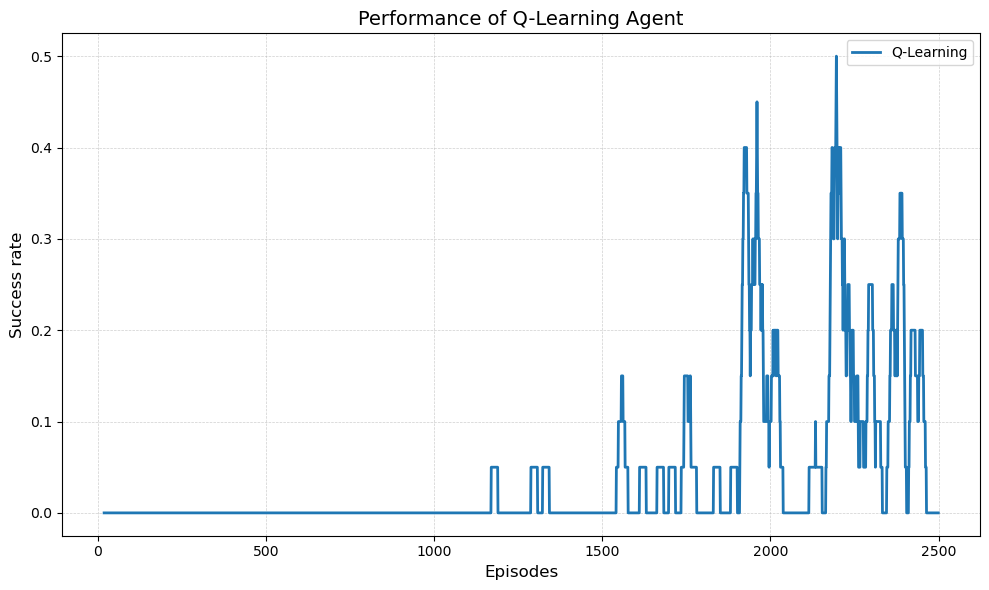

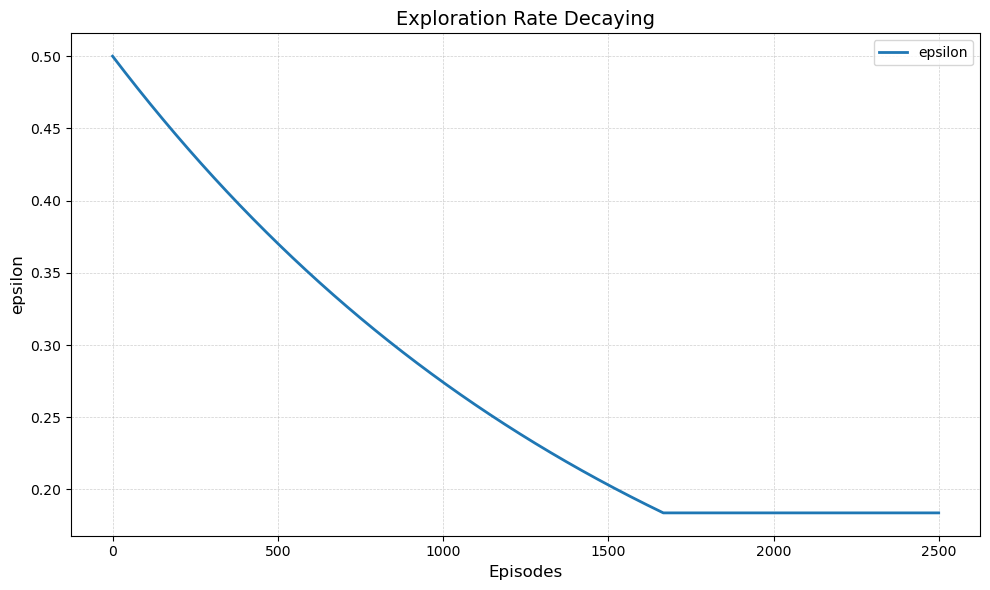

In [4]:
sm.visualizations.plot_moving_average([success],['Q-Learning'],20,
                                      title='Performance of Q-Learning Agent',ylabel='Success rate')
sm.visualizations.plot_series([epsilons],['epsilon'],title='Exploration Rate Decaying',
                              ylabel='epsilon')


In [5]:
epsilons

[0.5,
 0.4996996996996997,
 0.4993995797599401,
 0.4990996400723966,
 0.4987998805288096,
 0.49850030102098447,
 0.4982009014407917,
 0.49790168168016663,
 0.49760264163110945,
 0.49730378118568536,
 0.4970051002360243,
 0.496706598674321,
 0.4964082763928349,
 0.49611013328389025,
 0.4958121692398759,
 0.4955143841532454,
 0.4952167779165167,
 0.49491935042227253,
 0.49462210156316005,
 0.49432503123189087,
 0.49402813932124107,
 0.49373142572405115,
 0.4934348903332259,
 0.4931385330417345,
 0.4928423537426103,
 0.4925463523289511,
 0.4922505286939187,
 0.4919548827307392,
 0.4916594143327027,
 0.49136412339316354,
 0.49106900980554,
 0.4907740734633145,
 0.4904793142600332,
 0.49018473208930646,
 0.4898903268448084,
 0.48959609842027696,
 0.48930204670951405,
 0.4890081716063852,
 0.4887144730048198,
 0.48842095079881087,
 0.4881276048824152,
 0.48783443514975305,
 0.48754144149500844,
 0.48724862381242884,
 0.4869559819963253,
 0.4866635159410722,
 0.4863712255411076,
 0.4860791106

### Testing

In [ ]:
env = gym.make('MountainCar-v0', render_mode='human')
state, _ = env.reset()
discrete_state = sm.Q_Learning_Agent.get_discrete_state(state,env,discrete_state_intervals)
done = False

while not done:
    action = np.argmax(q_table[discrete_state])
    state, reward, terminated, truncated, info = env.step(action)
    discrete_state = sm.Q_Learning_Agent.get_discrete_state(state,env,discrete_state_intervals)
    env.render()
    
    done = sm.Q_Learning_Agent.evaluate_done(terminated,truncated)

env.close()
print(terminated)